<a href="https://colab.research.google.com/github/shreeshaa/BDA-homework-1/blob/master/10konly0.2pooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tweet-preprocessor
import pandas as pd
import numpy as np
import scipy as sp
import re
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from copy import deepcopy
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer 

import preprocessor as p

  Created wheel for tweet-preprocessor: filename=tweet_preprocessor-0.5.0-cp36-none-any.whl size=7947 sha256=540c0fe62bcb85b2948d43c50c986fc3c9132cd1418fa706a905c1e0c9e8fc83
  Stored in directory: /root/.cache/pip/wheels/1b/27/cc/49938e98a2470802ebdefae9d2b3f524768e970c1ebbe2dc4a
Successfully built tweet-preprocessor
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data = pd.read_csv("/content/drive/My Drive/WebProject/labeledTrainData.csv", delimiter="\t",names=["tweet", "label", "labelValue"])

In [0]:
data["label"].replace({"spam": "neutral", "normal": "neutral"}, inplace=True)
data["label"].replace({"neutral":1, "abusive": 2,"hateful":3}, inplace=True)

In [0]:
def preprocess_tweet(tweet):

    # 1. Remove URLs, emojis, mentions, smileys using tweet-preprocessor library
    # should not remove hashtags as hashtags contains important tweet content.
    
    #p.set_options(p.OPT.URL, p.OPT.EMOJI, p.OPT.MENTION,p.OPT.RESERVED,	p.OPT.SMILEY,p.OPT.NUMBER)
    clean = p.clean(tweet)
    # 2. Remove HTML tags using Beautiful soup library
    no_tag = BeautifulSoup(clean).get_text()

    # 3. Expanding hashtags.
    
    #tweets_expanded = expand_hashtags(no_tag)

    # 4. Remove non letter char using re
    letters_only = re.sub("[^a-zA-Z]"," ", no_tag)
    #letters_only = re.sub("[^a-zA-Z]"," ", tweets_expanded)
    
    # 5. Convert to lower case
    lower_case = letters_only.lower()
    words = lower_case.split()

    new_words = []
    # ps = PorterStemmer() 
    # for w in words:
    #     new_words.append(ps.stem(w))
    for w in words:
        new_words.append(w)
    # print(new_words[0:4])
    # 5. Remove stop words
    # stops = set(stopwords.words("english")) 
    # final_words = [w for w in new_words if not w in stops]
    final_words = new_words

    return(" ".join( final_words ))

In [0]:
data["tweet"][0]

'Beats by Dr. Dre urBeats Wired In-Ear Headphones - White https://t.co/9tREpqfyW4 https://t.co/FCaWyWRbpE'

In [0]:
num_tweets = data["tweet"].size
# print(num_tweets)
for i in range(num_tweets):
    data["tweet"][i] = preprocess_tweet(data["tweet"][i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
hateful = data["label"]==3
hateful = data[hateful]
hateful = hateful.sample(frac=1)
hateful = hateful.reset_index(drop=True)
hateful = hateful[:4333]
hateful['hateful'] = 1
hateful['abusive'] = 0
hateful['neutral'] = 0

In [0]:
hateful.head()

,tweet,label,labelValue,hateful,abusive,neutral
0,my sister is mad as hell we haf to watch huck ...,3,3,1,0,0
1,so you still mad a niggas apology,3,4,1,0,0
2,they sound like black men and white people wit...,3,2,1,0,0
3,i hate when bitches quote nicki s lyrics wrong...,3,3,1,0,0
4,i wont beef with hoes behind a nigga i get rid...,3,3,1,0,0


In [0]:
abusive = data["label"]==2
abusive = data[abusive]
abusive = abusive.sample(frac=1)
abusive = abusive.reset_index(drop=True)
abusive = abusive[:4333]
abusive['hateful'] = 0
abusive['abusive'] = 1
abusive['neutral'] = 0

In [0]:
neutral = data["label"]==1
neutral = data[neutral]
neutral = neutral.sample(frac=1)
neutral = neutral.reset_index(drop=True)
neutral = neutral[:4334]
neutral['hateful'] = 0
neutral['abusive'] = 0
neutral['neutral'] = 1

In [0]:
union = pd.concat([hateful, abusive,neutral])

In [0]:
union = union.sample(frac=1)
union = union.reset_index(drop=True)

In [0]:
union.shape

(13000, 6)

In [0]:
train = union[:10000]
validation = union[10000:11000]
test = union[11000:13000]

In [118]:
test.shape

AttributeError: ignored

In [0]:
train[train["label"] == 3]

,tweet,label,labelValue,hateful,abusive,neutral
2,its retarded is what it is,3,2,1,0,0
4,they took a side road now return to do incredi...,3,3,1,0,0
5,you have to lick my balls mharti what my chapp...,3,3,1,0,0
8,holy shit jscxmanny comes out tomorrow i m gon...,3,2,1,0,0
10,rt if you still hate this nigga,3,4,1,0,0
...,...,...,...,...,...,...
9986,opportunist hypocrite says he s shocked by che...,3,4,1,0,0
9991,because they are either illegals idiots or both,3,4,1,0,0
9992,you wouldn t retweet her if you knew she fucke...,3,3,1,0,0
9995,advertising it gets it out there word of mouth...,3,2,1,0,0


In [0]:
%matplotlib inline

In [0]:
!pip install transformers

import logging
import time
from platform import python_version

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import torch
import torch.nn as nn
import torch.nn.functional as F
import transformers
from sklearn.metrics import roc_auc_score
from torch.autograd import Variable

     |████████████████████████████████| 573kB 4.7MB/s 
     |████████████████████████████████| 890kB 20.3MB/s 
     |████████████████████████████████| 1.0MB 33.0MB/s 
     |████████████████████████████████| 3.7MB 12.9MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.41-cp36-none-any.whl size=893334 sha256=21b8a4f80f82c1e44ac661eb441e364ce57613bac6447f10985360827ff00917
  Stored in directory: /root/.cache/pip/wheels/22/5a/d4/b020a81249de7dc63758a34222feaa668dbe8ebfe9170cc9b1
Successfully built sacremoses


In [0]:
model_class = transformers.BertModel
tokenizer_class = transformers.BertTokenizer
pretrained_weights='bert-base-uncased'
# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
bert_model = model_class.from_pretrained(pretrained_weights)

In [0]:
max_seq = 100
target_columns = ["hateful", "abusive", "neutral"]

In [0]:
def tokenize_text(df, max_seq):
    return [
        tokenizer.encode(text, add_special_tokens=True)[:max_seq] for text in df.tweet.values
    ]


def pad_text(tokenized_text, max_seq):
    return np.array([el + [0] * (max_seq - len(el)) for el in tokenized_text])


def tokenize_and_pad_text(df, max_seq):
    tokenized_text = tokenize_text(df, max_seq)
    padded_text = pad_text(tokenized_text, max_seq)
    return torch.tensor(padded_text)


def targets_to_tensor(df):
    return torch.tensor(df[target_columns].values, dtype=torch.float32)

In [0]:
train_indices = tokenize_and_pad_text(train, max_seq)
val_indices = tokenize_and_pad_text(validation, max_seq)
test_indices = tokenize_and_pad_text(test, max_seq)

In [0]:
val_indices.shape

torch.Size([1000, 100])

In [0]:
with torch.no_grad():
  for i in range(10):
    if i == 0:
      x_train = bert_model(train_indices[:1000])[0]
      x_val = bert_model(val_indices[:1000])[0]
      x_test = bert_model(test_indices[:1000])[0]
    else:
      x_train = torch.cat((x_train,bert_model(train_indices[i*1000:(i+1)*1000])[0]),dim=0)
      x_val = torch.cat((x_val,bert_model(val_indices[i*1000:(i+1)*1000])[0]),dim=0)
      x_test = torch.cat((x_test,bert_model(test_indices[i*1000:(i+1)*1000])[0]),dim=0)

In [30]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

torch.Size([10000, 100, 768])
torch.Size([1000, 100, 768])
torch.Size([2000, 100, 768])


In [0]:
y_train = targets_to_tensor(train)
y_val = targets_to_tensor(validation)
y_test = targets_to_tensor(test)

In [36]:
y_test.shape

torch.Size([2000, 3])

In [0]:
A = torch.tensor(np.ones((10,10)))
B = torch.tensor(np.zeros((10,10)))
A= torch.stack((A, B),dim=0)
A.shape

torch.Size([2, 10, 10])

In [0]:
torch.save(x_train, 'x_train.pt')
torch.save(x_val, 'x_val.pt')
torch.save(x_test, 'x_test.pt')
torch.save(y_train, 'y_train.pt')
torch.save(y_val, 'y_val.pt')
torch.save(y_test, 'y_test.pt')

In [38]:
x_train[0]

tensor([[-0.5437,  0.3525,  0.4502,  ..., -0.3395,  0.6068, -0.5397],
        [-0.7195,  0.0863, -0.5477,  ...,  0.6511,  1.0970, -0.8434],
        [-0.3099,  0.4976,  0.0355,  ...,  0.2724,  0.3376, -0.2649],
        ...,
        [ 0.1826, -0.1471,  0.9286,  ..., -0.5793,  0.2482, -0.9020],
        [ 0.0977, -0.1560,  0.9154,  ..., -0.5688,  0.1542, -0.8533],
        [ 0.1149,  0.0280,  0.8311,  ..., -0.5627,  0.1388, -0.9206]])

In [0]:
class KimCNN(nn.Module):
    def __init__(self, embed_num, embed_dim, class_num, kernel_num, kernel_sizes, dropout, static):
        super(KimCNN, self).__init__()

        V = embed_num
        D = embed_dim
        C = class_num
        Co = kernel_num
        Ks = kernel_sizes
        
        self.static = static
        self.embed = nn.Embedding(V, D)
        self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, (K, D)) for K in Ks])
        self.dropout = nn.Dropout(dropout)
        self.fc1 = nn.Linear(len(Ks) * Co, C)
        self.sigmoid = nn.Sigmoid()
        

    def forward(self, x):
        if self.static:
            x = Variable(x)

        x = x.unsqueeze(1)  # (N, Ci, W, D)

        x = [F.relu(conv(x)).squeeze(3) for conv in self.convs1]  # [(N, Co, W), ...]*len(Ks)

        x = [F.max_pool1d(i, i.size(2)).squeeze(2) for i in x]  # [(N, Co), ...]*len(Ks)

        x = torch.cat(x, 1)
        x = self.dropout(x)  # (N, len(Ks)*Co)
        logit = self.fc1(x)  # (N, C)
        output = self.sigmoid(logit)
        return output

In [0]:
embed_num = x_train.shape[1]
embed_dim = x_train.shape[2]
class_num = y_train.shape[1]
kernel_num = 3
kernel_sizes = [2, 3, 4]
dropout = 0.2
static = True

In [0]:
model = KimCNN(
    embed_num=embed_num,
    embed_dim=embed_dim,
    class_num=class_num,
    kernel_num=kernel_num,
    kernel_sizes=kernel_sizes,
    dropout=dropout,
    static=static,
)

In [0]:
n_epochs = 10
batch_size = 10
lr = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
loss_fn = nn.BCELoss()

In [0]:
def generate_batch_data(x, y, batch_size):
    i, batch = 0, 0
    for batch, i in enumerate(range(0, len(x) - batch_size, batch_size), 1):
        x_batch = x[i : i + batch_size]
        y_batch = y[i : i + batch_size]
        yield x_batch, y_batch, batch
    if i + batch_size < len(x):
        yield x[i + batch_size :], y[i + batch_size :], batch + 1
    if batch == 0:
        yield x, y, 1

In [110]:
train_losses, val_losses = [], []

for epoch in range(n_epochs):
    start_time = time.time()
    train_loss = 0

    model.train(True)
    for x_batch, y_batch, batch in generate_batch_data(x_train, y_train, batch_size):
        y_pred = model(x_batch)
        optimizer.zero_grad()
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= batch
    train_losses.append(train_loss)
    elapsed = time.time() - start_time

    model.eval() # disable dropout for deterministic output
    with torch.no_grad(): # deactivate autograd engine to reduce memory usage and speed up computations
        val_loss, batch = 0, 1
        for x_batch, y_batch, batch in generate_batch_data(x_val, y_val, batch_size):
            y_pred = model(x_batch)
            loss = loss_fn(y_pred, y_batch)
            val_loss += loss.item()
        val_loss /= batch
        val_losses.append(val_loss)

    print(
        "Epoch %d Train loss: %.2f. Validation loss: %.2f. Elapsed time: %.2fs."
        % (epoch + 1, train_losses[-1], val_losses[-1], elapsed)
    )

Epoch 1 Train loss: 0.47. Validation loss: 0.38. Elapsed time: 41.90s.
Epoch 2 Train loss: 0.41. Validation loss: 0.36. Elapsed time: 42.24s.
Epoch 3 Train loss: 0.39. Validation loss: 0.36. Elapsed time: 41.96s.
Epoch 4 Train loss: 0.37. Validation loss: 0.36. Elapsed time: 42.13s.
Epoch 5 Train loss: 0.35. Validation loss: 0.37. Elapsed time: 41.85s.
Epoch 6 Train loss: 0.34. Validation loss: 0.38. Elapsed time: 42.04s.
Epoch 7 Train loss: 0.33. Validation loss: 0.39. Elapsed time: 41.98s.
Epoch 8 Train loss: 0.32. Validation loss: 0.39. Elapsed time: 42.17s.
Epoch 9 Train loss: 0.31. Validation loss: 0.40. Elapsed time: 41.89s.
Epoch 10 Train loss: 0.30. Validation loss: 0.41. Elapsed time: 42.22s.


Text(0.5, 1.0, 'Losses')

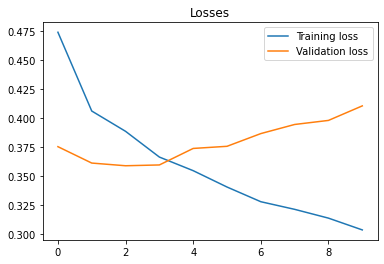

In [111]:
plt.plot(train_losses, label="Training loss")
plt.plot(val_losses, label="Validation loss")
plt.legend()
plt.title("Losses")

In [0]:
model.eval() # disable dropout for deterministic output
with torch.no_grad(): # deactivate autograd engine to reduce memory usage and speed up computations
    y_preds = []
    batch = 0
    for x_batch, y_batch, batch in generate_batch_data(x_test, y_test, batch_size):
        y_pred = model(x_batch)
        
        y_preds.extend(y_pred.cpu().numpy().tolist())
    y_preds_np = np.array(y_preds)

In [113]:
y_preds_np

array([[9.69713092e-01, 4.75730039e-02, 1.16506871e-03],
       [9.14694667e-01, 5.53126074e-02, 2.59443503e-02],
       [1.29353702e-01, 8.70588541e-01, 8.06119852e-03],
       ...,
       [9.77128267e-01, 2.10392382e-02, 5.22514712e-03],
       [1.15840010e-01, 8.73374999e-01, 1.17729874e-02],
       [9.91492808e-01, 1.57435071e-02, 4.59837931e-04]])

In [0]:
var = union[11000:13000]
y_test_np = var[target_columns].values

In [120]:
y_test_np[1000:]

array([[0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       ...,
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0]])

In [121]:
auc_scores = roc_auc_score(y_test_np, y_preds_np, average=None)
df_accuracy = pd.DataFrame({"label": target_columns, "auc": auc_scores})
df_accuracy.sort_values('auc')[::-1]

,label,auc
2,neutral,0.933458
1,abusive,0.895024
0,hateful,0.852074


In [122]:
b = np.zeros_like(y_preds_np)
b[np.arange(len(y_preds_np)), y_preds_np.argmax(1)] = 1
b

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [123]:
print(b[0])
print(np.argmax(b[0]))
print(y_test_np[0])
print(np.argmax(y_test_np[0]))

[1. 0. 0.]
0
[1 0 0]
0


In [124]:
y_test_np.shape[0]

2000

In [0]:
predicted = []
test = []
for i in range (b.shape[0]):
  predicted.append(np.argmax(b[i]))
  test.append(np.argmax(y_test_np[i]))

In [134]:
from sklearn.metrics import f1_score,precision_score
f1 = f1_score(test, predicted,average='macro' )
print('F1 score macro: %f' % f1)

f1 = f1_score(test, predicted,average='micro' )
print('F1 score macro: %f' % f1)

f1 = f1_score(test, predicted,average='weighted' )
print('F1 score macro: %f' % f1)

F1 score macro: 0.762933
F1 score macro: 0.764500
F1 score macro: 0.765039
